# **Predict weight from height - Linear Regression**

## **1. General**
* Goal: 
  * Build a simple linear regression model to predict weight $(y)$ from height $(x)$.
  * Compare the solution calculated by **Normal Equation** and optimized by **Gradient Descent**.
  * Evaluate the quality by $MSE$ and $R^2$.
* Dataset: 
  * **data_1.csv**: 20 lines of data generated by my own **(Data is for learning only)**.
  * **data_2.csv**: 7770 lines of data collected from **[Kaggle](https://www.kaggle.com/datasets/taweilo/taiwan-wright-and-weight-sampling-data)** (Keep weight and height columns only)

## **2. Import and environment**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(42)

## **3. Data loading and quick glance**

In [5]:
df = pd.read_csv('./data/data_2.csv')
df.head()
df.describe()

,Unnamed: 0,height,weight
count,7770.000000,7770.000000,7770.000000
mean,3884.500000,150.460698,52.817423
std,2243.150129,22.463589,18.356921
min,0.000000,65.120000,7.080000
25%,1942.250000,149.960000,42.700000
50%,3884.500000,157.495000,58.350000
75%,5826.750000,163.920000,66.050000
max,7769.000000,174.500000,77.880000


## **4. EDA - scatter + correlation**

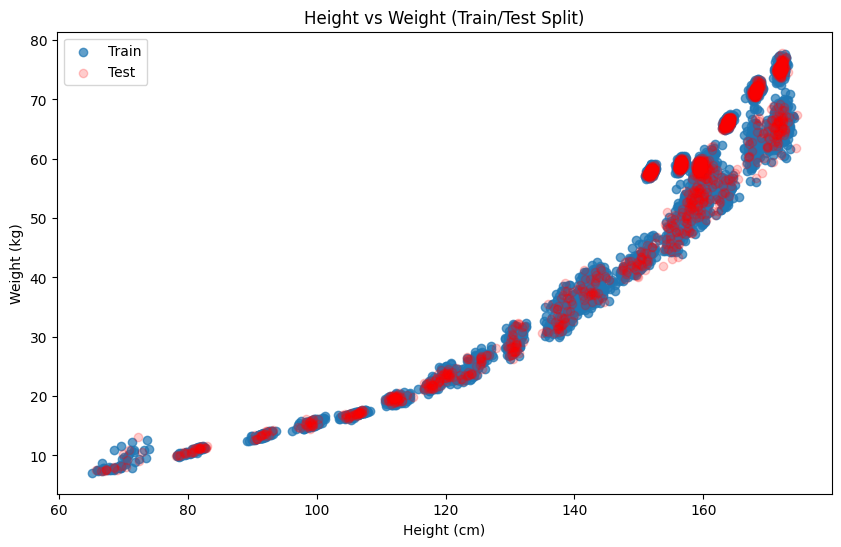

Correlation (train): 0.9516945944091173
Correlation (test): 0.949094579290931


In [6]:
X = df['height'].values.reshape(-1, 1)
Y = df['weight'].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label="Train", alpha=0.7)
plt.scatter(X_test, Y_test, label="Test", alpha=0.2, color="red", marker="o")
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight (Train/Test Split)')
plt.legend()
plt.show()

print('Correlation (train):', np.corrcoef(X_train.ravel(), Y_train)[0,1])
print('Correlation (test):', np.corrcoef(X_test.ravel(), Y_test)[0,1])
# If correlation is near 1, linear regression is appropriate

## **5. Why Linear Regression ?**
* When the relationship between height $(x)$ and weight $(y)$ is approximately linear, **linear regression** is a simple, easy-to-understand model.
* **Advantages:** Easy to interpret coefficients, fast, doest not over-fit too much if the data is small.
* **Disadvantages:** Not suitable if the relationship is strongly nonlinear.

### **5.1. What is "Linear" ?**
In mathematics and machine learning, **linear** refers to a relationship that can be expressed (or approximated) as a straight line.  

#### **5.1. Simple intuition**
- A **linear relationship** means that when the input variable $x$ changes, the output variable $y$ changes in a **constant rate**.
- Example: 
  $$
  y = 1 + 2x
  $$
  - If $x$ increases by 1, $y$ always increases by 2.  
  - The graph of this function is a straight line.

#### **5.2. In statistics & regression**
- When we say two variables are **linearly related**, we mean that the relationship between them can be described (approximately) by:
$$
y \approx \theta_0 + \theta_1 x
$$
- For example: height $(x)$ and weight $(y)$ usually have a positive linear relationship: taller people tend to weigh more, roughly along a straight line.

#### **5.3. Mathematical meaning**
- A function is linear if it satisfies:
$$
f(a x_1 + b x_2) = a f(x_1) + b f(x_2)
$$
- In machine learning, however, “linear” often means the model is of the form:
$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$
which corresponds to a straight line (1D), a plane (2D), or a hyperplane (higher dimensions).

#### **5.4. Linear vs. Non-linear**
- **Linear:** $y = 2 + 3x$ → straight line.  
- **Non-linear:** $y = x^2, y = \sin(x)$ → curves, not straight lines.  


## **6. Model and short equation**

Model: 
$$
\hat{y} = \theta_0 + \theta_1 x
$$

### **6.1. Why do we need a loss function?**
- In linear regression, we want the predicted value $\hat{y}$ to be **as close as possible** to the actual value $y$.  
- To measure **how far** predictions are from real data, we define a **loss function** (also called cost function).  
- A popular choice is **Mean Squared Error (MSE)**:
$$
J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m \big(\hat{y}^{(i)} - y^{(i)}\big)^2
= \frac{1}{2m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
$$

### **6.2. Why squared error?**
- Squaring ensures all errors are **positive** (avoid cancellation between positive/negative errors).  
- Squaring also **penalizes larger errors more strongly**, making the model fit better to outliers.

### **6.3. How to minimize the loss?**
Our goal is:
$$
\min_{\theta_0,\theta_1} J(\theta_0, \theta_1)
$$

There are two approaches:

1. **Normal Equation**  
   - Take the derivative of $J(\theta)$ with respect to $\theta$, set it to zero.  
   - This gives a closed-form solution:
   $$
   \theta = (X^\top X)^{-1} X^\top y
   $$
   - Best when the number of features $d$ is small to medium.

2. **Gradient Descent**  
   - Iteratively update parameters in the direction opposite to the gradient:  
   $$
   \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
   $$
   - Useful when $d$ is very large (normal equation becomes expensive).

These above formula will be proven in section **9. Appendix - Derivation Normal Equation**

## **7. Implementation**

### **7a. Normal equation**

In [7]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

ones = np.ones(X.shape)
XBar = np.concatenate((ones, X), axis=1)

theta_ne = np.linalg.pinv(XBar.T @ XBar) @ XBar.T @ Y   # @ is matrix multiply

# or using np.matmul(matrixA, matrix B)
# theta_ne = np.linalg.pinv(np.matmul(XBar.T, XBar))
# theta_ne = np.matmul(theta_ne, np.matmul(XBar.T, Y))

def compute_loss(X, Y, theta):
    m = len(Y)
    preds = X @ theta
    return (1/(2*m)) * np.sum((preds - Y)**2)

print(f"Theta (Normal equation):{theta_ne.ravel()}")
mse_ne = compute_loss(XBar, Y, theta_ne)
print("MSE (Normal Equation):", mse_ne)

Theta (Normal equation):[-64.13086289   0.77726801]
MSE (Normal Equation): 16.056406618397943


### **7b. Gradient Descent (vectorized)**

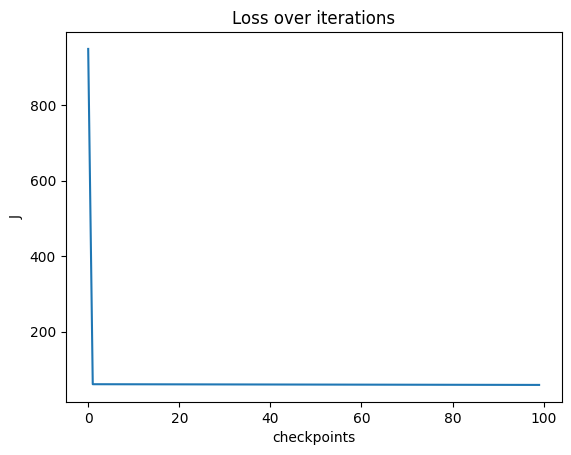

Theta (Gradient Descent): [-1.38065893  0.36930617]
MSE (Gradient Descent): 58.978766578728674


In [8]:
def gradient_descent(X, Y, theta0, alpha=1e-7, iters=2000, log_every=100):
    m = len(Y)
    theta = theta0.copy()
    J_hist = []
    for i in range(iters):
        grad = (1/m) * (X.T @ (X @ theta - Y))   # shape (2,1)
        theta = theta - alpha * grad
        if i % log_every == 0:
            J_hist.append(compute_loss(X, Y, theta))
    return theta, J_hist

theta0 = np.zeros((2, 1))
theta_gd, J_hist = gradient_descent(XBar, Y, theta0, alpha=1e-5, iters=100000, log_every=1000)
plt.plot(np.linspace(0, len(J_hist)-1, len(J_hist)), J_hist)
plt.title('Loss over iterations')
plt.xlabel('checkpoints')
plt.ylabel('J')
plt.show()

print("Theta (Gradient Descent):", theta_gd.ravel())
mse_gd = compute_loss(XBar, Y, theta_gd)
print("MSE (Gradient Descent):", mse_gd)


### **7c. Scikit-learn**

In [9]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
print("Theta:", model.intercept_[0], model.coef_[0][0])

y_pred = model.predict(X)
mse_sklearn = mean_squared_error(Y, y_pred) / 2
print("MSE (sklearn):", mse_sklearn)


Theta: -64.13086288625266 0.777268005601007
MSE (sklearn): 16.056406618397947


In [10]:
print(">"*10,"Training results", "<"*10)
print(f"Normal Equation\n\tTheta 0: {theta_ne.ravel()[0]}\n\tTheta 1: {theta_ne.ravel()[0]}\n\tMSE: {mse_ne}")
print(f"Gradient Descent\n\tTheta 0: {theta_gd.ravel()[0]}\n\tTheta 1: {theta_gd.ravel()[0]}\n\tMSE: {mse_gd}")
print(f"Scikit-learn\n\tTheta: {model.intercept_[0]}\n\tTheta: {model.coef_[0][0]}\n\tMSE: {mse_sklearn}")

>>>>>>>>>> Training results <<<<<<<<<<
Normal Equation
	Theta 0: -64.13086288626121
	Theta 1: -64.13086288626121
	MSE: 16.056406618397943
Gradient Descent
	Theta 0: -1.3806589272844354
	Theta 1: -1.3806589272844354
	MSE: 58.978766578728674
Scikit-learn
	Theta: -64.13086288625266
	Theta: 0.777268005601007
	MSE: 16.056406618397947


## **8. Evaluation**

In [11]:
# Normal equation
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(Y_train)

X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
Y_pred_normal = X_b_test.dot(theta_best)

# Gradient descent
Y_pred_gd = X_b_test.dot(theta_gd)

# Sklearn LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred_sklearn = model.predict(X_test)

print("MSE (Normal Equation):", mean_squared_error(Y_test, Y_pred_normal))
print("MSE (Gradient Descent):", mean_squared_error(Y_test, Y_pred_gd))
print("MSE (Sklearn):", mean_squared_error(Y_test, Y_pred_sklearn))


MSE (Normal Equation): 33.231830888669464
MSE (Gradient Descent): 116.50318427119699
MSE (Sklearn): 33.23183088866939


## **9. Appendix — Derivation Normal Equation**

Given m samples, each sample has a feature vector $x^{(i)} \in \R^d$ and a scalar label vector $y \in \R$.

Combine all $x^{(i)}$ into matrix $X \in \R^{m \times d}$, and all labels into vector $y \in \R^m$.

We can define the loss function:

$$
J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \|X\theta - y\|^2
$$

In matrix form:
$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

Take gradient by $\theta$. Apply the matrix derivation (with $A = X^TX$):
$$
\nabla_\theta J(\theta) = \frac{1}{2m} \cdot 2X^T (X\theta - y) = \frac{1}{m} X^T (X\theta - y)
$$

Set the gradient of $J(\theta)$ with respect to $\theta$ to zero:
$$
\frac{1}{m} X^T (X\theta - y) = 0 \implies X^TX\theta = X^T y
$$

If $X^TX$ invertible, multiply 2 sides with $(X^T X)^{-1}$ get:

$$
\boxed{\theta = (X^\top X)^{-1} X^\top y}
$$

which is the **Normal Equation**.

## **10. Conclusion**

* In this notebook, we built a **simple linear regression model** to predict **weight** from **height** using three approaches:
  1. **Normal Equation** (analytical solution).
  2. **Gradient Descent** (iterative optimization).
  3. **Scikit-learn LinearRegression** (library implementation).

* **Findings:**
  - All three methods give consistent results for parameters $(\theta_0, \theta_1)$.
  - **MSE** and **$R^2$** indicate that the model explains the data well, though not perfectly (as weight depends on more factors than just height).
  - **Normal Equation** is simple and exact for small feature sets, while **Gradient Descent** is scalable to large datasets.

* **Key Takeaways:**
  - Linear Regression is a strong baseline model for regression problems.
  - The choice of method depends on dataset size:
    - Small → Normal Equation is efficient.
    - Large / high-dimensional → Gradient Descent is preferred.
  - Real-world prediction of weight from height alone has limitations → additional features (e.g., age, gender, lifestyle) would improve accuracy.

* **Next Steps:**
  - Extend model with multiple features (Multiple Linear Regression).
  - Explore more advanced models (Polynomial Regression, Regularization).
  - Compare with nonlinear methods if data shows curvature.
